# Intensity vs Fermi Chopper frequency -- Chopper 2

Just try the original parameters

In [1]:
cd ~/dv/sns-chops/resolution/ARCS/PyChop/

/SNS/users/lj7/dv/sns-chops/resolution/ARCS/PyChop


In [2]:
import numpy as np, os, sys, glob
from matplotlib import pyplot as plt

In [53]:
from mcni.utils import conversion as C

In [3]:
%matplotlib notebook

Exp data

In [4]:
import Vdata2018
reload(Vdata2018)

<module 'Vdata2018' from 'Vdata2018.pyc'>

In [5]:
# expdata = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_FC1_2018.dat'))
expdata = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_FC2_2018_v2.dat'))

reading data. please wait...
  done


In [12]:
monitor_int_data = np.loadtxt('../V_Cali_MonitorInt_FC2_2018_v2.dat')
runno2monitorint = dict()
for runno, mint in monitor_int_data:
    runno2monitorint[int(runno)] = mint

In [13]:
unique_nominal_Eis = set( list(expdata.Ei_list)) 

In [14]:
# unique_nominal_Eis

In [83]:
Ei = 100.

In [84]:
condition = np.isclose(expdata.vdata.Energy, Ei)

In [85]:
expdata.vdata.RunNumber[condition]

13     108045.0
32     108064.0
69     108101.0
82     108114.0
106    108138.0
119    108151.0
137    108169.0
152    108184.0
174    107983.0
198    108007.0
217    108026.0
Name: RunNumber, dtype: float64

In [86]:
expdata.chopper_freqs[condition]

array([ 180.,  240.,  300.,  360.,  420.,  480.,  540.,  600.,   60.,
         60.,  120.])

In [87]:
mint = np.array([runno2monitorint[rn] for rn in expdata.vdata.RunNumber[condition]])

<IPython.core.display.Javascript object>


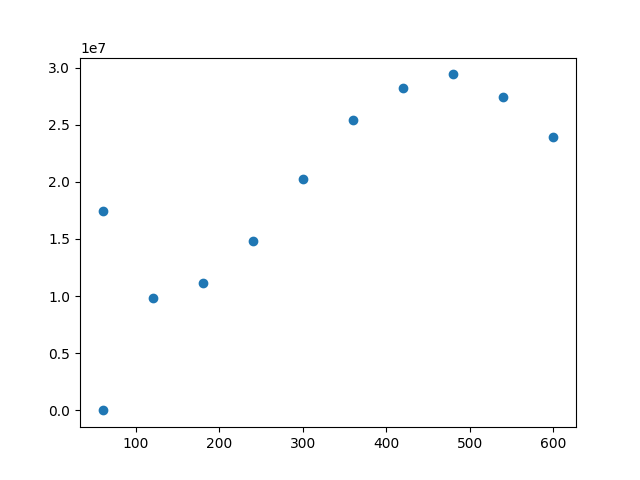

In [88]:
plt.figure()
freqs = expdata.chopper_freqs[condition]
plt.plot(freqs, mint*C.e2v(Ei), 'o')

PyChop

In [22]:
sys.path.insert(0, "/SNS/users/lj7/dv")

In [23]:
from PyChop import PyChop2

In [24]:
instrument = PyChop2('arcs-opt.yaml', 'ARCS-100-1.5-SMI', 600)

In [25]:
instrument.getFlux(Ei_in=100)

array([ 248.54820504])

In [143]:
instrument.moderator.getFlux(100.)

array([ 439607.78323405])

In [144]:
instrument.chopper_system.getTransmission(100., 600.)

0.00056538627049356155

In [145]:
439607.78323405 * .00056538627049356155

248.54820504264154

In [78]:
def intensity_pychop(
    fc_freq,
    E=0, 
    aperture_width=0.1751, S1=281., S2=79., B1=0.087, B2=0.4, Emod=172., 
    Ei = 100.,
    fc_pslit = 1.5, fc_pslat = 0.41, fc_radius=50., fc_rho = 580.,
    fc_choice='ARCS-100-1.5-SMI'):
    
    template = open('./arcs-opt-template.yaml').read()
    content = template.format(aperture_width=aperture_width)
    optyaml = 'arcs-opt.yaml'
    with open(optyaml, 'wt') as of:
        of.write(content)
    instrument = PyChop2(optyaml, fc_choice, fc_freq)
    instrument.ei = Ei
    instrument.moderator.mod_pars = [S1, S2, B1, B2, Emod]
    # print instrument.moderator.mod_pars

    fc = instrument.chopper_system.packages[fc_choice]
    fc.pslit = fc_pslit
    fc.pslat = fc_pslat
    fc.radius = fc_radius
    fc.rho = fc_rho
    flux = instrument.getFlux(Ei)
    flux = flux[0]
    res = instrument.getResolution(0)
    res = res[0]
    ret = res*flux
    # if not np.isfinite(ret):
    #    ret = 0.
    return ret

In [79]:
from PyChop import Chop
reload(Chop)

<module 'PyChop.Chop' from '/SNS/users/lj7/dv/PyChop/Chop.pyc'>

In [90]:
scale = 3e4

/SNS/users/lj7/dv/PyChop/Chop.py:92: UserWarning: PyChop: achop(): No transmission at 100.000 meV at 180 Hz
  warnings.warn('PyChop: achop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq), UserWarning)
/SNS/users/lj7/dv/PyChop/Chop.py:54: UserWarning: PyChop: tchop(): No transmission at 100.000 meV at 180 Hz
  warnings.warn('PyChop: tchop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq))
/SNS/users/lj7/dv/PyChop/Chop.py:54: UserWarning: PyChop: tchop(): No transmission at 100.000 meV at  60 Hz
  warnings.warn('PyChop: tchop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq))
/SNS/users/lj7/dv/PyChop/Chop.py:54: UserWarning: PyChop: tchop(): No transmission at 100.000 meV at  60 Hz
  warnings.warn('PyChop: tchop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq))
/SNS/users/lj7/dv/PyChop/Chop.py:92: UserWarning: PyChop: achop(): No transmission at 100.000 meV at 120 Hz
  warnings.warn('PyChop: achop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq), UserWar

<IPython.core.display.Javascript object>


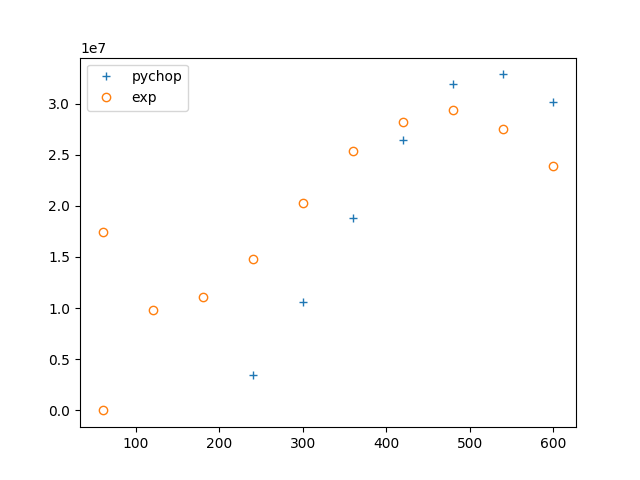

In [91]:
res = [intensity_pychop(fc_freq=f) for f in freqs]
plt.figure()
plt.plot(freqs, np.array(res)*scale, '+', label='pychop')
plt.plot(freqs, mint*C.e2v(Ei), 'o', mfc='none', label='exp')
#plt.ylim(3, 6.5)
plt.legend()

# Try plotting more Eis

In [72]:
def getExpXY(Ei):
    "return freq, intensity"
    condition = np.isclose(expdata.vdata.Energy, Ei)
    x = expdata.chopper_freqs[condition]
    y = np.array([runno2monitorint[rn] for rn in expdata.vdata.RunNumber[condition]]) *C.e2v(Ei)
    return x,y

/SNS/users/lj7/dv/PyChop/Chop.py:92: UserWarning: PyChop: achop(): No transmission at 100.000 meV at 180 Hz
  warnings.warn('PyChop: achop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq), UserWarning)
/SNS/users/lj7/dv/PyChop/Chop.py:54: UserWarning: PyChop: tchop(): No transmission at 100.000 meV at 180 Hz
  warnings.warn('PyChop: tchop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq))
/SNS/users/lj7/dv/PyChop/Chop.py:54: UserWarning: PyChop: tchop(): No transmission at 100.000 meV at  60 Hz
  warnings.warn('PyChop: tchop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq))
/SNS/users/lj7/dv/PyChop/Chop.py:54: UserWarning: PyChop: tchop(): No transmission at 100.000 meV at  60 Hz
  warnings.warn('PyChop: tchop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq))
/SNS/users/lj7/dv/PyChop/Chop.py:92: UserWarning: PyChop: achop(): No transmission at 100.000 meV at 120 Hz
  warnings.warn('PyChop: achop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq), UserWar

<IPython.core.display.Javascript object>


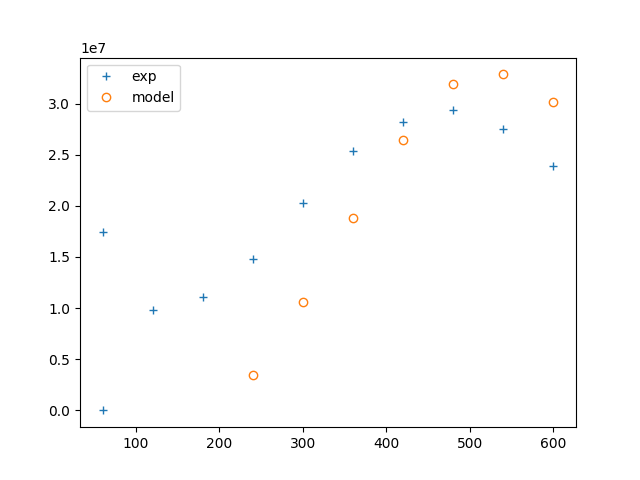

In [92]:
Ei = 100
freqs, expInt = getExpXY(Ei)
modelInt = np.array([intensity_pychop(fc_freq=f) for f in freqs])

plt.figure()
plt.plot(freqs, expInt, '+', label='exp')
plt.plot(freqs, modelInt*scale, 'o', mfc='none', label='model')
# plt.ylim(3, 6.5)
plt.legend()

In [37]:
set(expdata.vdata.Energy)

{8.0,
 10.0,
 12.0,
 15.0,
 20.0,
 25.0,
 30.0,
 40.0,
 50.0,
 60.0,
 70.0,
 80.0,
 90.0,
 100.0,
 125.0,
 150.0,
 200.0,
 250.0,
 300.0,
 400.0,
 500.0,
 600.0}

<IPython.core.display.Javascript object>


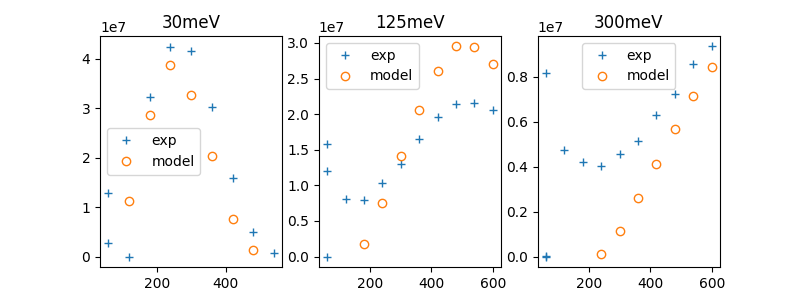

/SNS/users/lj7/dv/PyChop/Chop.py:92: UserWarning: PyChop: achop(): No transmission at 30.000 meV at  60 Hz
  warnings.warn('PyChop: achop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq), UserWarning)
/SNS/users/lj7/dv/PyChop/Chop.py:54: UserWarning: PyChop: tchop(): No transmission at 30.000 meV at  60 Hz
  warnings.warn('PyChop: tchop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq))
/SNS/users/lj7/dv/PyChop/Chop.py:92: UserWarning: PyChop: achop(): No transmission at 30.000 meV at  60 Hz
  warnings.warn('PyChop: achop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq), UserWarning)
/SNS/users/lj7/dv/PyChop/Chop.py:54: UserWarning: PyChop: tchop(): No transmission at 30.000 meV at  60 Hz
  warnings.warn('PyChop: tchop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq))
/SNS/users/lj7/dv/PyChop/Chop.py:92: UserWarning: PyChop: achop(): No transmission at 125.000 meV at 120 Hz
  warnings.warn('PyChop: achop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq)

In [99]:
Eilist = [30, 125, 300]
N = len(Eilist)
plt.figure(figsize=(8,3))

for i, Ei in enumerate(Eilist):
    freqs, expInt = getExpXY(Ei)
    modelInt = np.array([intensity_pychop( fc_freq=f, Ei=Ei, fc_rho=640.) for f in freqs])

    plt.subplot(1, N, i+1)
    plt.title('%smeV' % Ei)
    plt.plot(freqs, expInt, '+', label='exp')
    plt.plot(freqs, modelInt*scale, 'o', mfc='none', label='model')
    # plt.ylim(3, 6.5)
    plt.legend()

# All energies

In [39]:
unique_nominal_Eis

{8.0,
 10.0,
 12.0,
 15.0,
 20.0,
 25.0,
 30.0,
 40.0,
 50.0,
 60.0,
 70.0,
 80.0,
 90.0,
 100.0,
 125.0,
 150.0,
 200.0,
 250.0,
 300.0,
 400.0,
 500.0,
 600.0}

<IPython.core.display.Javascript object>


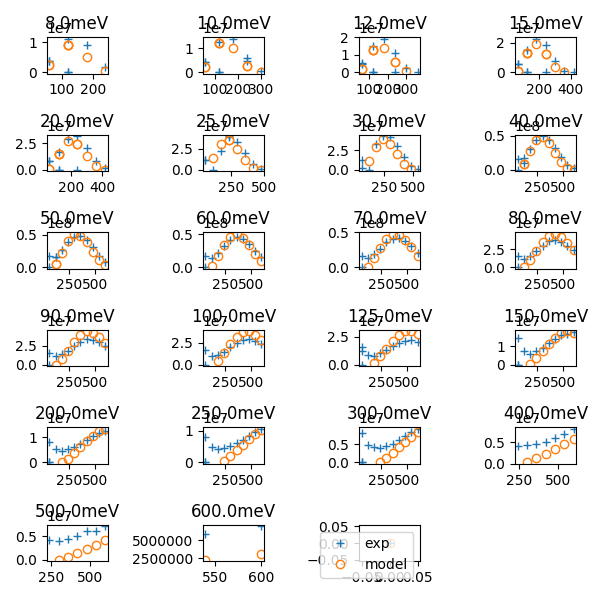

In [100]:
Ei_list = sorted(unique_nominal_Eis)
N = len(Ei_list)
cols = 4
# rows = (N-1)//cols + 1
rows = N//cols + 1
plt.figure(figsize=(6,6))

import warnings
for i, Ei in enumerate(Ei_list):
    freqs, expInt = getExpXY(Ei)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        modelInt = np.array([intensity_pychop(fc_freq=f, Ei=Ei, fc_rho=640.) for f in freqs])

    plt.subplot(rows, cols, i+1)
    plt.title('%smeV' % Ei)
    plt.plot(freqs, expInt, '+', label='exp')
    plt.plot(freqs, modelInt*scale, 'o', mfc='none', label='model')
    # plt.ylim(3, 6.5)
plt.subplot(rows, cols, N+1)
plt.plot([0], [0], '+', label='exp')
plt.plot([0], [0], 'o', mfc='none', label='model')
plt.legend()
plt.tight_layout()